In [69]:
cd /Users/paterosthodoris/Desktop/MSBA/MSBA_FALL_2023/STAT_6289/Final_Project/FP_DATA

/Users/paterosthodoris/Desktop/MSBA/MSBA_FALL_2023/STAT_6289/Final_Project/FP_DATA


## Load pickle objects

In [70]:
import pickle

In [71]:
X=pickle.load(open('X.pkl','rb'))
y=pickle.load(open('y.pkl','rb'))

In [72]:
X=X/255

In [73]:
X.shape

(287, 150, 150, 3)

## Import packages

In [74]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
import time

## Create tensorboard object for model visualizations

In [75]:
NAME = f'vessel_movements-{int(time.time())}'
tensorboard=TensorBoard(log_dir=f'logs/{NAME}/')

## Build the CNN Model 

In [76]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(512, input_shape=X.shape[1:], activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X,y, batch_size = 10, epochs=15,validation_split=0.1,callbacks=[tensorboard])

Epoch 1/15
26/26 [==============================] - 15s 462ms/step - loss: 0.9602 - accuracy: 0.5426 - val_loss: 0.6712 - val_accuracy: 0.6207
Epoch 2/15
26/26 [==============================] - 13s 483ms/step - loss: 0.6719 - accuracy: 0.6008 - val_loss: 0.6848 - val_accuracy: 0.6207
Epoch 3/15
26/26 [==============================] - 12s 471ms/step - loss: 0.6611 - accuracy: 0.5891 - val_loss: 0.5514 - val_accuracy: 0.8276
Epoch 4/15
26/26 [==============================] - 12s 451ms/step - loss: 0.5534 - accuracy: 0.6860 - val_loss: 0.4829 - val_accuracy: 0.6897
Epoch 5/15
26/26 [==============================] - 12s 453ms/step - loss: 0.4970 - accuracy: 0.7442 - val_loss: 0.4512 - val_accuracy: 0.6897
Epoch 6/15
26/26 [==============================] - 11s 426ms/step - loss: 0.4620 - accuracy: 0.7713 - val_loss: 0.5348 - val_accuracy: 0.6897
Epoch 7/15
26/26 [==============================] - 12s 458ms/step - loss: 0.4126 - accuracy: 0.7713 - val_loss: 0.4290 - val_accuracy: 0.7586

In [77]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 17, 17, 128)    

## Plotting

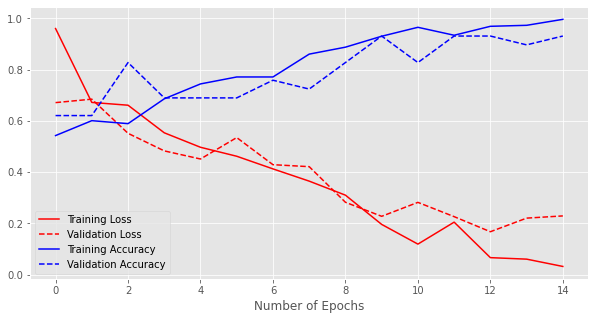

In [78]:
# Plot the error and accuracy
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], c='red', label='Training Loss')
plt.plot(history.history['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(history.history['accuracy'], c='blue', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

## Prediction Example

1/1 [==============================] - 0s 63ms/step


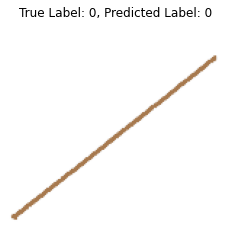

True Label: 0
Predicted Label: 0
Raw Prediction Probabilities: [[1. 0.]]
-----------------------------------------
1/1 [==============================] - 0s 57ms/step


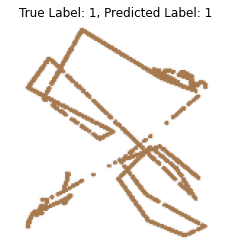

True Label: 1
Predicted Label: 1
Raw Prediction Probabilities: [[0. 1.]]
-----------------------------------------


In [27]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

#Load pickled X and y
with open('X.pkl', 'rb') as file:
    X = pickle.load(file)
with open('y.pkl', 'rb') as file:
    y = pickle.load(file)

#Get two random indices from X
random_indices = np.random.randint(0, len(X), size=2)

for random_index in random_indices:
    random_example = X[random_index]
    true_label = y[random_index]

    #Make a prediction using the model
    prediction = model.predict(np.expand_dims(random_example, axis=0))

    #Get the predicted level
    predicted_label = np.argmax(prediction)

    #Display image
    plt.imshow(random_example, cmap='gray')
    plt.axis('off')
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.show()

    #Predicted vs True label
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")

    #Raw prediction probabilities
    print("Raw Prediction Probabilities:", prediction)
    print("-----------------------------------------")